In [1]:
!pip install regex
!pip install demoji
!pip install plotly
!pip install wordcloud


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import re

import regex
import demoji

import numpy as np
from collections import Counter

import plotly.express as px
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import display



In [3]:
# Nombre del archivo
file_name = 'Chat Nini y Tiny 13.txt'

# Leer el archivo de texto
with open(file_name, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Imprimir las primeras 10 líneas para verificar el contenido
for i, line in enumerate(lines[:10]):
    print(f"Línea {i+1}: {line}")


Línea 1: 6/12/23, 6:20:33 PM - Nini ❤️: ‎Los mensajes y las llamadas están cifrados de extremo a extremo. Nadie fuera de este chat, ni siquiera WhatsApp, puede leerlos ni escucharlos.

Línea 2: 6/12/23, 6:20:33 PM - Anthony ✌️: Entonces te llamas Nina?

Línea 3: ‎6/12/23, 6:20:38 PM - Anthony ✌️: ‎<Omitted Sticker>

Línea 4: 6/12/23, 6:44:25 PM - Nini ❤️: Sii

Línea 5: 6/12/23, 6:44:40 PM - Nini ❤️: Mi nombre es un poco fuera de lo común

Línea 6: ‎6/12/23, 6:44:41 PM - Nini ❤️: ‎<Omitted Sticker>

Línea 7: 6/12/23, 6:58:09 PM - Anthony ✌️: Jsjsjssj

Línea 8: 6/12/23, 6:58:32 PM - Anthony ✌️: A mi prima le decimos siempre Nina pero se llama Jenny

Línea 9: 6/12/23, 6:58:49 PM - Anthony ✌️: Pero es curioso que te llames así

Línea 10: ‎6/12/23, 6:58:59 PM - Anthony ✌️: ‎<Omitted Sticker>



In [4]:
# Función para extraer la fecha
def extraer_fecha(linea):
    fecha_patron = r'^\d{1,2}/\d{1,2}/\d{2,4}'
    fecha = re.search(fecha_patron, linea)
    return fecha.group(0) if fecha else None

# Función para extraer la hora
def extraer_hora(linea):
    hora_patron = r'\d{1,2}:\d{2}:\d{2}\s[APM]{2}'
    hora = re.search(hora_patron, linea)
    return hora.group(0) if hora else None

# Función para extraer el miembro
def extraer_miembro(linea):
    miembro_patron = r'-\s(.*?):'
    miembro = re.search(miembro_patron, linea)
    return miembro.group(1) if miembro else None

# Función para extraer el mensaje
def extraer_mensaje(linea):
    mensaje_patron = r':\s(.*)'
    mensaje = re.search(mensaje_patron, linea)
    return mensaje.group(1) if mensaje else None

# Crear listas para almacenar los datos
fechas = []
horas = []
miembros = []
mensajes = []

# Variable para almacenar la última fecha conocida
ultima_fecha = None

# Procesar cada línea del chat
for linea in lines:
    fecha = extraer_fecha(linea)
    if fecha:
        ultima_fecha = fecha
    else:
        fecha = ultima_fecha

    fechas.append(fecha)
    horas.append(extraer_hora(linea))
    miembros.append(extraer_miembro(linea))
    mensajes.append(extraer_mensaje(linea))

# Convertir las fechas al formato YYYY-MM-DD
fechas = pd.to_datetime(fechas, format='%d/%m/%y', dayfirst=True).strftime('%Y-%m-%d')

In [5]:
# Crear un DataFrame con los datos extraídos
data = {
    'Fecha': fechas,
    'Hora': horas,
    'Miembro': miembros,
    'Mensaje': mensajes
}

df = pd.DataFrame(data)

# Utilizar el método display para visualizar el DataFrame
display(df.head())

,Fecha,Hora,Miembro,Mensaje
0,2023-12-06,6:20:33 PM,Nini ❤️,‎Los mensajes y las llamadas están cifrados de...
1,2023-12-06,6:20:33 PM,Anthony ✌️,Entonces te llamas Nina?
2,2023-12-06,6:20:38 PM,Anthony ✌️,‎<Omitted Sticker>
3,2023-12-06,6:44:25 PM,Nini ❤️,Sii
4,2023-12-06,6:44:40 PM,Nini ❤️,Mi nombre es un poco fuera de lo común


In [6]:
display(df.tail(10))


,Fecha,Hora,Miembro,Mensaje
36272,2024-05-16,6:58:17 PM,Anthony ✌️,Pero ya se aclaró que era mi mente
36273,2024-05-16,6:58:19 PM,Anthony ✌️,Mala mía
36274,2024-05-16,6:58:39 PM,Anthony ✌️,Si medio que parece que me hago de rogar no ha...
36275,2024-05-16,6:59:02 PM,Anthony ✌️,Pero camina conmigo
36276,2024-05-16,6:59:07 PM,Anthony ✌️,‎<Omitted Sticker>
36277,2024-05-16,6:59:19 PM,Anthony ✌️,Te amoooo mi chiquita
36278,2024-05-16,6:59:25 PM,Anthony ✌️,Lo hiciste muy bien hoy día
36279,2024-05-16,6:59:29 PM,Anthony ✌️,Lo de la u
36280,2024-05-16,6:59:48 PM,Anthony ✌️,Y pues todo saldrá muy bien
36281,2024-05-16,6:59:50 PM,Anthony ✌️,Ya vas a ver


In [7]:
start_date = '2023-12-06'
end_date = '2024-05-17'

df_filtrado = df[(df['Fecha'] >= start_date) & (df['Fecha'] <= end_date)]

In [8]:

display(df_filtrado)

,Fecha,Hora,Miembro,Mensaje
0,2023-12-06,6:20:33 PM,Nini ❤️,‎Los mensajes y las llamadas están cifrados de...
1,2023-12-06,6:20:33 PM,Anthony ✌️,Entonces te llamas Nina?
2,2023-12-06,6:20:38 PM,Anthony ✌️,‎<Omitted Sticker>
3,2023-12-06,6:44:25 PM,Nini ❤️,Sii
4,2023-12-06,6:44:40 PM,Nini ❤️,Mi nombre es un poco fuera de lo común
...,...,...,...,...
36277,2024-05-16,6:59:19 PM,Anthony ✌️,Te amoooo mi chiquita
36278,2024-05-16,6:59:25 PM,Anthony ✌️,Lo hiciste muy bien hoy día
36279,2024-05-16,6:59:29 PM,Anthony ✌️,Lo de la u
36280,2024-05-16,6:59:48 PM,Anthony ✌️,Y pues todo saldrá muy bien


In [9]:


def ObtenerEmojis(Mensaje):
    if isinstance(Mensaje, str):
        emoji_lista = []
        data = regex.findall(r'\X', Mensaje)  # Obtener lista de caracteres de cada mensaje
        for caracter in data:
            if demoji.replace(caracter) != caracter:
                emoji_lista.append(caracter)
        return emoji_lista
    else:
        return []

# Obtener la cantidad total de mensajes
total_mensajes = df.shape[0]

# Obtener la cantidad de archivos multimedia enviados
multimedia_mensajes = df['Mensaje'].str.contains('<Media omitted>', case=False, regex=True, na=False).sum()

# Obtener la cantidad de audios omitidos
audios_omitidos = df['Mensaje'].str.contains('<Omitted Audio>', case=False, regex=True, na=False).sum()

# Obtener la cantidad de stickers omitidos
stickers_omitidos = df['Mensaje'].str.contains('<Omitted Sticker>', case=False, regex=True, na=False).sum()

# Obtener la cantidad de emojis enviados
df['Emojis'] = df['Mensaje'].apply(ObtenerEmojis)  # Se agrega columna 'Emojis'
emojis = sum(df['Emojis'].str.len())

# Obtener la cantidad de links enviados
url_patron = r'(https?://\S+)'
df['URLs'] = df['Mensaje'].apply(lambda x: len(re.findall(url_patron, str(x))) if isinstance(x, str) else 0)
links = sum(df['URLs'])

# Obtener la cantidad de encuestas
encuestas = df[df['Mensaje'] == 'POLL:'].shape[0]

# Todos los datos pasarlo a diccionario
estadistica_dict = {'Tipo': ['Mensajes', 'Multimedia', 'Audios', 'Stickers', 'Emojis', 'Links', 'Encuestas'],
                    'Cantidad': [total_mensajes, multimedia_mensajes, audios_omitidos, stickers_omitidos, emojis, links, encuestas]
                   }

# Convertir diccionario a dataframe
estadistica_df = pd.DataFrame(estadistica_dict, columns=['Tipo', 'Cantidad'])

# Establecer la columna Tipo como índice
estadistica_df = estadistica_df.set_index('Tipo')

# Alinear el encabezado "Cantidad"
styled_df = estadistica_df.style.set_properties(**{'text-align': 'left'})
styled_df = styled_df.set_table_styles(
    [dict(selector='th', props=[('text-align', 'center')])]
)

display(estadistica_df)

,Cantidad
Tipo,
Mensajes,36282
Multimedia,620
Audios,764
Stickers,5373
Emojis,1344
Links,35
Encuestas,0


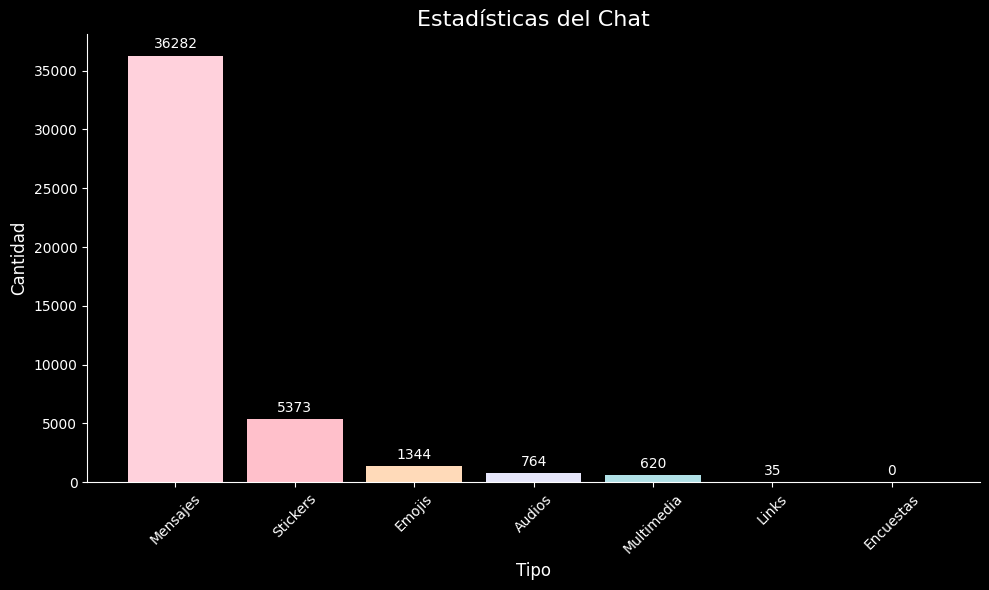

In [10]:


# Obtener los datos del DataFrame
tipos = estadistica_df.index.tolist()
cantidades = estadistica_df['Cantidad'].tolist()

# Crear una lista de tuplas (tipo, cantidad) y ordenarla de mayor a menor
datos_ordenados = sorted(zip(tipos, cantidades), key=lambda x: x[1], reverse=True)

# Separar los tipos y cantidades ordenados
tipos_ordenados, cantidades_ordenadas = zip(*datos_ordenados)

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))

# Definir una paleta de colores pastel
colores_pastel = ['#FFD1DC', '#FFC0CB', '#FFDAB9', '#E6E6FA', '#B0E0E6', '#98FB98', '#AFEEEE']
n_colores = len(tipos_ordenados)
colores = colores_pastel[:n_colores]

# Graficar las barras con la paleta de colores pastel y los datos ordenados
barras = ax.bar(tipos_ordenados, cantidades_ordenadas, color=colores)

# Personalizar el gráfico
ax.set_title('Estadísticas del Chat', fontsize=16, color='white')
ax.set_xlabel('Tipo', fontsize=12, color='white')
ax.set_ylabel('Cantidad', fontsize=12, color='white')
ax.tick_params(axis='x', labelsize=10, labelrotation=45, colors='white')
ax.tick_params(axis='y', labelsize=10, colors='white')

# Agregar etiquetas con los valores encima de cada barra
for barra in barras:
    altura = barra.get_height()
    ax.annotate(f'{altura}', xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom',
                fontsize=10, color='white')

# Configurar el fondo negro
fig.set_facecolor('black')
ax.set_facecolor('black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [11]:
# Obtener emojis más usados y las cantidades en el chat del grupo del dataframe
emojis_lista = list([a for b in df.Emojis for a in b])
emoji_diccionario = dict(Counter(emojis_lista))
emoji_diccionario = sorted(emoji_diccionario.items(), key=lambda x: x[1], reverse=True)

# Convertir el diccionario a dataframe
emoji_df = pd.DataFrame(emoji_diccionario, columns=['Emoji', 'Cantidad'])

# Establecer la columna Emoji como índice
emoji_df = emoji_df.set_index('Emoji').head(10)

print('Número emojis únicos usados: ', len(emoji_df), '\n')
emoji_df

Número emojis únicos usados:  10 



,Cantidad
Emoji,
❤️,756
🥰,126
🫶🏻,47
😔,39
😻,38
🥺,28
🙄,25
💕,22
💘,20


In [12]:
# Plotear el pie de los emojis más usados
fig = px.pie(emoji_df, values='Cantidad', names=emoji_df.index, hole=.3, template='plotly_dark', color_discrete_sequence=px.colors.qualitative.Pastel2)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title={'text': 'Emojis usados con mas frecuencia 📲', 'y':0.96, 'x':0.5, 'xanchor': 'center'}, font=dict(size=17))
fig.show()

In [16]:
# Determinar los miembros válidos
miembros_validos = ['Anthony ✌️', 'Nini ❤️']

# Filtrar el DataFrame para incluir solo los miembros válidos
df_filtrado = df[df['Miembro'].isin(miembros_validos)]

# Calcular el número de mensajes por miembro
df_MiembrosActivos = df_filtrado.groupby('Miembro')['Mensaje'].count().sort_values(ascending=False).to_frame()
df_MiembrosActivos.reset_index(inplace=True)
df_MiembrosActivos.index = np.arange(1, len(df_MiembrosActivos)+1)

# Calcular el porcentaje de mensajes para cada miembro
total_mensajes = df_MiembrosActivos['Mensaje'].sum()
df_MiembrosActivos['% Mensaje'] = (df_MiembrosActivos['Mensaje'] / total_mensajes) * 100

df_MiembrosActivos

,Miembro,Mensaje,% Mensaje
1,Anthony ✌️,20290,56.130353
2,Nini ❤️,15858,43.869647


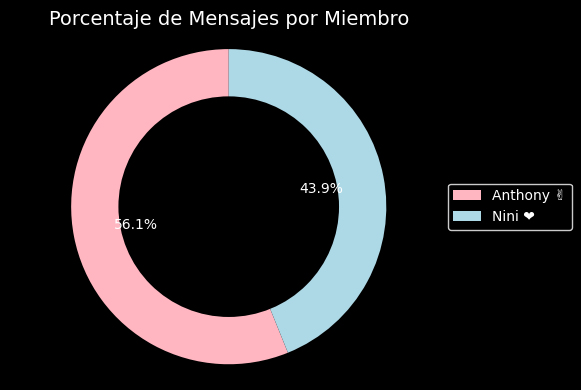

In [17]:

# Obtener los datos del DataFrame
miembros = df_MiembrosActivos['Miembro'].tolist()
porcentajes = df_MiembrosActivos['% Mensaje'].tolist()

# Definir los colores pastel
colores = ['#FFB6C1', '#ADD8E6']  # Rojo pastel y celeste pastel

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(6, 4))

# Crear el gráfico de anillos
wedges, labels, autopct_texts = ax.pie(porcentajes, colors=colores, autopct='%1.1f%%', startangle=90, textprops={'color': 'white'})

# Crear un círculo negro en el centro para formar el anillo
centro_circulo = plt.Circle((0, 0), 0.70, fc='black')
ax.add_artist(centro_circulo)

# Agregar la leyenda centrada a la derecha del gráfico
ax.legend(wedges, miembros, loc='center right', bbox_to_anchor=(1.3, 0.5), facecolor='black', edgecolor='white', labelcolor='white')

# Personalizar el gráfico
ax.set_title('Porcentaje de Mensajes por Miembro', fontsize=14, color='white')
ax.axis('equal')

# Configurar el fondo negro
fig.set_facecolor('black')
ax.set_facecolor('black')

# Ajustar el espaciado y mostrar el gráfico
plt.tight_layout()
plt.show()

In [18]:
# Separar mensajes (sin multimedia) y multimedia (stickers, fotos, videos)
multimedia_df = df[df['Mensaje'] == '<Media omitted>']
mensajes_df = df.drop(multimedia_df.index)

# Obtener la cantidad de emojis y URLs por mensaje
mensajes_df['Emojis'] = mensajes_df['Mensaje'].apply(ObtenerEmojis)
mensajes_df['URLs'] = mensajes_df['Mensaje'].apply(lambda x: len(re.findall(url_patron, str(x))) if isinstance(x, str) else 0)

# Contar la cantidad de palabras y letras por mensaje
mensajes_df['Letras'] = mensajes_df['Mensaje'].apply(lambda s: len(str(s)) if isinstance(s, str) else 0)
mensajes_df['Palabras'] = mensajes_df['Mensaje'].apply(lambda s: len(str(s).split(' ')) if isinstance(s, str) else 0)

# Mostrar las últimas filas
mensajes_df.tail()

,Fecha,Hora,Miembro,Mensaje,Emojis,URLs,Letras,Palabras
36277,2024-05-16,6:59:19 PM,Anthony ✌️,Te amoooo mi chiquita,[],0,21,4
36278,2024-05-16,6:59:25 PM,Anthony ✌️,Lo hiciste muy bien hoy día,[],0,27,6
36279,2024-05-16,6:59:29 PM,Anthony ✌️,Lo de la u,[],0,10,4
36280,2024-05-16,6:59:48 PM,Anthony ✌️,Y pues todo saldrá muy bien,[],0,27,6
36281,2024-05-16,6:59:50 PM,Anthony ✌️,Ya vas a ver,[],0,12,4


In [19]:
# Obtener a todos los miembros
miembros = mensajes_df['Miembro'].unique()

# Crear diccionario donde se almacenará todos los datos
diccionario = {}

# Miembros válidos
miembros_validos = ['Nini ❤️', 'Anthony ✌️']

for miembro in miembros:
    if miembro in miembros_validos:
        # Filtrar mensajes de un miembro en específico
        miembro_df = mensajes_df[mensajes_df['Miembro'] == miembro]

        # Agregar a la lista el número total de mensajes enviados
        total_mensajes = miembro_df.shape[0]

        # Agregar a la lista el número de palabras por total de mensajes (palabras por mensaje)
        palabras_totales = miembro_df['Palabras'].sum()
        palabras_por_mensaje = palabras_totales / total_mensajes if total_mensajes > 0 else 0

        # Agregar a la lista el número de mensajes multimedia enviados
        multimedia = multimedia_df[multimedia_df['Miembro'] == miembro].shape[0]

        # Agregar a la lista el número total de emojis enviados
        emojis = sum(miembro_df['Emojis'].str.len())

        # Agregar a la lista el número total de links enviados
        links = sum(miembro_df['URLs'])

        # Asignar los valores como lista a la llave del diccionario
        diccionario[miembro] = [total_mensajes, palabras_por_mensaje, multimedia, emojis, links]

print(diccionario)

{'Nini ❤️': [15858, 4.5407995964182115, 0, 337, 11], 'Anthony ✌️': [20290, 7.244011828486939, 0, 1007, 22]}


In [20]:
# Crear el DataFrame a partir del diccionario
miembro_stats_df = pd.DataFrame.from_dict(diccionario, orient='index', columns=['Mensajes', 'Palabras por mensaje', 'Multimedia', 'Emojis', 'Links'])

# Convertir las columnas a entero donde sea necesario
miembro_stats_df['Mensajes'] = miembro_stats_df['Mensajes'].astype(int)
miembro_stats_df['Multimedia'] = miembro_stats_df['Multimedia'].astype(int)
miembro_stats_df['Emojis'] = miembro_stats_df['Emojis'].astype(int)
miembro_stats_df['Links'] = miembro_stats_df['Links'].astype(int)

# Ordenar por la columna 'Mensajes'
miembro_stats_df = miembro_stats_df.sort_values(by='Mensajes', ascending=False)

# Mostrar el DataFrame final
print(miembro_stats_df)



            Mensajes  Palabras por mensaje  Multimedia  Emojis  Links
Anthony ✌️     20290              7.244012           0    1007     22
Nini ❤️        15858              4.540800           0     337     11


In [21]:

# Crea una nueva columna 'rangoHora' en tu DataFrame 'df' utilizando la función pd.to_datetime
df['rangoHora'] = pd.to_datetime(df['Hora'], format='%I:%M:%S %p', errors='coerce')

# Define una función para crear el rango de horas
def create_range_hour(hour):
    if pd.notna(hour):
        hour = pd.to_datetime(hour)  # Convertir a objeto de Python datetime si es necesario
        start_hour = int(hour.hour)  # Convertir a entero
        end_hour = int((hour + pd.Timedelta(hours=1)).hour)  # Convertir a entero
        return f'{start_hour:02d} - {end_hour:02d} h'
    else:
        return np.nan

# Aplica la función create_range_hour a la nueva columna 'rangoHora' utilizando el método apply
df['rangoHora'] = df['rangoHora'].apply(create_range_hour)

# Verifica el resultado
display(df)

,Fecha,Hora,Miembro,Mensaje,Emojis,URLs,rangoHora
0,2023-12-06,6:20:33 PM,Nini ❤️,‎Los mensajes y las llamadas están cifrados de...,[],0,18 - 19 h
1,2023-12-06,6:20:33 PM,Anthony ✌️,Entonces te llamas Nina?,[],0,18 - 19 h
2,2023-12-06,6:20:38 PM,Anthony ✌️,‎<Omitted Sticker>,[],0,18 - 19 h
3,2023-12-06,6:44:25 PM,Nini ❤️,Sii,[],0,18 - 19 h
4,2023-12-06,6:44:40 PM,Nini ❤️,Mi nombre es un poco fuera de lo común,[],0,18 - 19 h
...,...,...,...,...,...,...,...
36277,2024-05-16,6:59:19 PM,Anthony ✌️,Te amoooo mi chiquita,[],0,18 - 19 h
36278,2024-05-16,6:59:25 PM,Anthony ✌️,Lo hiciste muy bien hoy día,[],0,18 - 19 h
36279,2024-05-16,6:59:29 PM,Anthony ✌️,Lo de la u,[],0,18 - 19 h
36280,2024-05-16,6:59:48 PM,Anthony ✌️,Y pues todo saldrá muy bien,[],0,18 - 19 h


In [22]:


# Asegurarse de que la columna "Fecha" esté en formato de fecha y hora
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Crear una nueva columna "DiaSemana" con los días de la semana en inglés
df['DiaSemana'] = df['Fecha'].dt.strftime('%A')

# Crear un diccionario de mapeo de los días de la semana en inglés a español
mapeo_dias_espanol = {'Monday': '1 Lunes', 'Tuesday': '2 Martes', 'Wednesday': '3 Miércoles', 'Thursday': '4 Jueves',
                      'Friday': '5 Viernes', 'Saturday': '6 Sábado', 'Sunday': '7 Domingo'}

# Aplicar el mapeo a la columna "DiaSemana"
df['DiaSemana'] = df['DiaSemana'].map(mapeo_dias_espanol)

# Mostrar el DataFrame resultante
display(df)

,Fecha,Hora,Miembro,Mensaje,Emojis,URLs,rangoHora,DiaSemana
0,2023-12-06,6:20:33 PM,Nini ❤️,‎Los mensajes y las llamadas están cifrados de...,[],0,18 - 19 h,3 Miércoles
1,2023-12-06,6:20:33 PM,Anthony ✌️,Entonces te llamas Nina?,[],0,18 - 19 h,3 Miércoles
2,2023-12-06,6:20:38 PM,Anthony ✌️,‎<Omitted Sticker>,[],0,18 - 19 h,3 Miércoles
3,2023-12-06,6:44:25 PM,Nini ❤️,Sii,[],0,18 - 19 h,3 Miércoles
4,2023-12-06,6:44:40 PM,Nini ❤️,Mi nombre es un poco fuera de lo común,[],0,18 - 19 h,3 Miércoles
...,...,...,...,...,...,...,...,...
36277,2024-05-16,6:59:19 PM,Anthony ✌️,Te amoooo mi chiquita,[],0,18 - 19 h,4 Jueves
36278,2024-05-16,6:59:25 PM,Anthony ✌️,Lo hiciste muy bien hoy día,[],0,18 - 19 h,4 Jueves
36279,2024-05-16,6:59:29 PM,Anthony ✌️,Lo de la u,[],0,18 - 19 h,4 Jueves
36280,2024-05-16,6:59:48 PM,Anthony ✌️,Y pues todo saldrá muy bien,[],0,18 - 19 h,4 Jueves


In [23]:


# Asumo que ya tienes tu DataFrame 'df' cargado con las columnas necesarias ('Fecha', 'Hora', 'Miembro', 'Mensaje', 'Emojis', 'URLs', 'rangoHora')

# Crear una columna de 1 para realizar el conteo de mensajes
df['# Mensajes por hora'] = 1

# Sumar (contar) los mensajes que tengan la misma fecha y rango de hora
mensajes_hora = df.groupby('rangoHora')['# Mensajes por hora'].sum().reset_index()

# Plotear la cantidad de mensajes respecto del tiempo
fig = px.line(mensajes_hora, x='rangoHora', y='# Mensajes por hora', color_discrete_sequence=['salmon'], template='plotly_dark')

# Ajustar el gráfico
fig.update_layout(
    title={'text': 'Mensajes con ella ❤️ por hora',
           'y': 0.96,
           'x': 0.5,
           'xanchor': 'center'},
    font=dict(size=17)
)
fig.update_traces(mode='markers+lines', marker=dict(size=10))
fig.update_xaxes(title_text='Rango de hora', tickangle=30)
fig.update_yaxes(title_text='# Mensajes')

# Mostrar el gráfico
fig.show()

In [24]:


# Asumo que ya tienes tu DataFrame 'df' cargado con las columnas necesarias ('Fecha', 'Hora', 'Miembro', 'Mensaje', 'Emojis', 'URLs', 'rangoHora', 'DiaSemana')

# Crear una columna de 1 para realizar el conteo de mensajes
df['# Mensajes por día'] = 1

# Sumar (contar) los mensajes que tengan la misma fecha y día de la semana
date_df = df.groupby('DiaSemana')['# Mensajes por día'].sum().reset_index()

# Plotear la cantidad de mensajes respecto del tiempo
fig = px.line(date_df, x='DiaSemana', y='# Mensajes por día', color_discrete_sequence=['salmon'], template='plotly_dark')

# Ajustar el gráfico
fig.update_layout(
    title={'text': 'Mensajes con ella ❤️ por día', 'y': 0.96, 'x': 0.5, 'xanchor': 'center'},
    font=dict(size=17)
)
fig.update_traces(mode='markers+lines', marker=dict(size=10))
fig.update_xaxes(title_text='Día', tickangle=30)
fig.update_yaxes(title_text='# Mensajes')

# Mostrar el gráfico
fig.show()

In [25]:
# Contar el número de mensajes por día de la semana
mensajes_por_dia = df.groupby('DiaSemana')['Mensaje'].count().reset_index(name='# Mensajes por día')

# Crear un DataFrame con las columnas deseadas y los valores de conteo de mensajes
resultado = mensajes_por_dia[['DiaSemana', '# Mensajes por día']]

# Mostrar el resultado
display(resultado)

,DiaSemana,# Mensajes por día
0,1 Lunes,5179
1,2 Martes,4784
2,3 Miércoles,6242
3,4 Jueves,4828
4,5 Viernes,5177
5,6 Sábado,4556
6,7 Domingo,5404


In [27]:




# Crear una columna de 1 para realizar el conteo de mensajes
df['# Mensajes por día'] = 1

# Sumar (contar) los mensajes que tengan la misma fecha
date_df = df.groupby('Fecha')['# Mensajes por día'].sum().reset_index()

# Plotear la cantidad de mensajes respecto del tiempo
fig = px.line(date_df, x='Fecha', y='# Mensajes por día', color_discrete_sequence=['salmon'], template='plotly_dark')

# Ajustar el gráfico
fig.update_layout(
    title={'text': 'Mensajes con ella ❤️',
           'y': 0.96,
           'x': 0.5,
           'xanchor': 'center'},
    font=dict(size=17)
)
fig.update_xaxes(title_text='Fecha', tickangle=45, nticks=35)
fig.update_yaxes(title_text='# Mensajes')

# Mostrar el gráfico
fig.show()


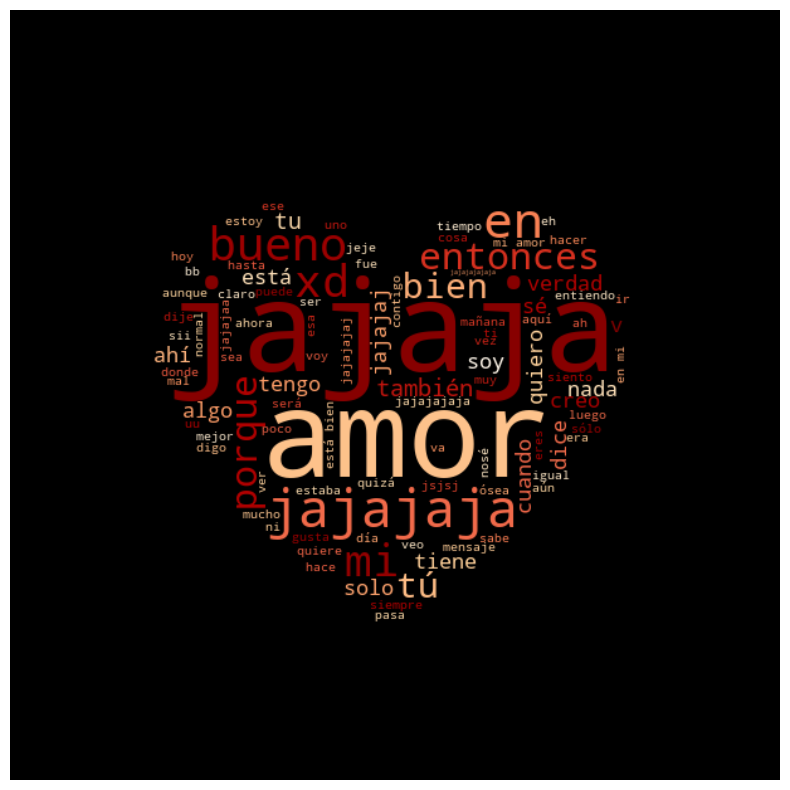

In [29]:

# Filtrar solo los mensajes (excluir filas con 'Media omitted', 'Omitted Sticker', etc.)
mensajes_df = df[~df['Mensaje'].isin(['<Media omitted>', '<Omitted Sticker>', '<Omitted Audio>'])]

# Crear un string que contendrá todas las palabras
total_palabras = ' '

# Definir las stopwords (palabras a ignorar)
stopwords = set(STOPWORDS)
stopwords.update(['que', 'qué', 'con', 'de', 'te', 'la', 'lo', 'le', 'el', 'las', 'los', 'les', 'por', 'es',
                  'son', 'se', 'para', 'un', 'una', 'chicos', 'su', 'si', 'chic', 'nos', 'ya', 'hay', 'esta',
                  'pero', 'del', 'mas', 'más', 'eso', 'este', 'como', 'así', 'todo', 'https', 'Media', 'Omitted',
                  'y','.','o', 'editó','q', 'yo', 'al', 'Sticker', 'Audio','pue','pues'])

# Cargar la imagen de la máscara
mask = np.array(Image.open('corazon jeje.jpg'))

# Obtener y acumular todas las palabras de cada mensaje
for mensaje in mensajes_df['Mensaje'].values:
    palabras = str(mensaje).lower().split()  # Obtener las palabras de cada línea del mensaje
    for palabra in palabras:
        if palabra not in stopwords:
            total_palabras = total_palabras + palabra + ' '  # Acumular todas las palabras

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=800, background_color='black', stopwords=stopwords,
                      max_words=100, min_font_size=5, mask=mask, colormap='OrRd').generate(total_palabras)

# Plotear la nube de palabras más usadas
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()